<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера V3</b></font>
    <br />
    <font size="3", color = "black">
<br />    
Приветствую снова!

Теперь, когда баг устранён корректно, у меня нет причин снова отправлять на доработку. Смело переходи к следующим проектам. Успехов!

<font color='blue'> <b> Добрый день! Проблему понял. Исправил индексы входящих значений в selected на неповторяющиеся с помощью .reset_index(drop=True) в связи с разъяснённой дилеммой.

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера V2</b></font>
    <br />
    <font size="3", color = "black">
<br />
Привет ещё раз!

2/3 замечаний устранены, по ним вопросов нет. А вот с багом с индексами твой вариант устранений не очень корректный. В своём обёмном комментарии пояснил в чём именно некорректность + ещё раз предложил другой, корректный вариант устранения проблемы.

Так что жду ещё одну отправку. Надеюсь, финальную.

<font color='blue'> <b> Добрый день! Спасибо за конструктивную критику. Постарался исправить все замечания.

<div class="alert alert-info">
<font size="4"><b>Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />
    Привет, Андрей! Спасибо, что прислал задание :) <br>Меня зовут Никита Сон и я буду проверять твой проект. Предлагаю обращаться друг к другу на ты, как это принято в Практикуме, если ты не против. Но если хочешь на Вы - не буду возражать 🙂
        
Поехали 🚀
    <br />

Мои комментарии обозначены пометкой <b>Комментарий ревьюера</b>. При внесении правок в проект, пожалуйста, не меняй и не удаляй их т.к. дальнейшая проверка будет происходить в том числе на основе того, исправлены замечания в комментариях или нет. Зато ты всегда можешь оставить свои комментарии для меня :)
    </font>
</div>

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />
В зелёных блоках будут позитивные комментарии
<br />
    </font>
</div>

<div class="alert alert-warning">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />
В жёлтых - некритичные замечания
    </font>
</div>

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />
В красных - важные замечания, которые надо обязательно устранить
    </font>
</div>

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />
В синих с пиццей - различные нейтральные сообщения, советы на будущее и прочее.
    </font>
</div>

In [ ]:
%%capture
!pip install -U scikit-learn

# install phik (if not installed yet)
import sys
!"{sys.executable}" -m pip install phik

!pip install shap
import shap


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import phik
import seaborn as sns

# импортируем функцию
from phik import phik_matrix
from phik.report import plot_correlation_matrix

# класс ColumnTransformer помогает работать с данными разного типа в одном наборе
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# загружаем дополнительные классы для преобразования данных
from sklearn.preprocessing import MinMaxScaler

# загружаем нужные метрики
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from scipy import stats as st

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [ ]:
# загрузим данные
try:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv', decimal = ',')
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv', decimal = ',')
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv', decimal = ',')

except:
    try:
        geo_data_0 = pd.read_csv("geo_data_0.csv", decimal = ',')
        geo_data_1 = pd.read_csv("geo_data_1.csv", decimal = ',')
        geo_data_2 = pd.read_csv("geo_data_2.csv", decimal = ',')
    except:
        print("Unable to load data")

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />    
Спасибо, что делаешь безопасную загрузку данных с помощью try except. Тут за многими невнимательными студентами приходится по доброте душевной исправлять :)

### Анализ базы geo_data_0

In [ ]:
# посмотрим данные
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.7057449842080644,-0.4978225001976334,1.22116994843607,105.28006184349583
1,2acmU,1.3347112926051892,-0.3401642528583136,4.3650803324282,73.03775026515737
2,409Wp,1.0227322634721168,0.15199044457022945,1.4199262386740652,85.26564713099945
3,iJLyR,-0.03217162450743976,0.13903270818447744,2.9785659663204838,168.62077555509563
4,Xdl7t,1.988431059439699,0.15541267777667178,4.751769119262962,154.03664673738086


In [ ]:
# преобразуем данные типа object в данные типа float64
geo_data_0[['f0', 'f1', 'f2', 'product']] = geo_data_0[['f0', 'f1', 'f2', 'product']].apply(pd.to_numeric)
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
# проверим наличие дубликатов
geo_data_0.duplicated().sum()

0

In [ ]:
# оценим статистическое распределение
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


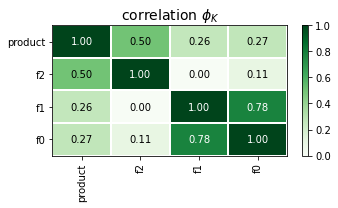

In [ ]:
# корреляционный анализ признаков
geo_data_00 = geo_data_0.iloc()[::100].iloc[:, [1, 2, 3, 4]]
interval_cols = geo_data_00.select_dtypes(include=["number"]).columns[0:11]

phik_overview = phik_matrix(geo_data_00, interval_cols=interval_cols)
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.0,
    figsize=(5, 3)
)

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />    
Молодец, что проверяешь признаки на мультиколлинеарность. Для линейных моделей это важно, а у нас именно тот случай.

<div class="alert alert-warning">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />
Есть ли польза от корреляции id и признаков? Кажется, нет. Такие бесполезные вещи не стоит визуализировать, идентификатор следовало убрать из матрицы

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера V2</b></font>
    <br />
    <font size="3", color = "black">
<br />    
Приятно, когда студент обращает внимание не только на красные комментарии!

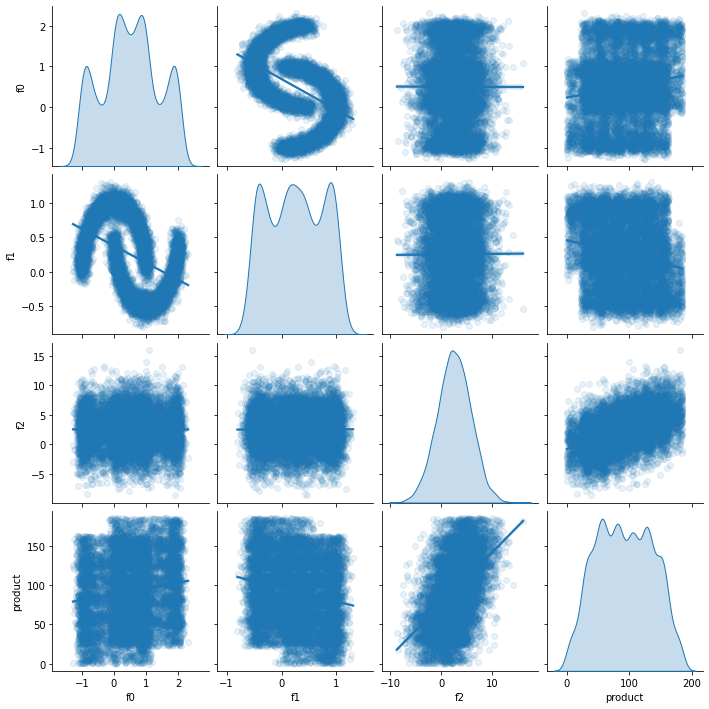

In [ ]:
# оценим рассеяние признаков и целевого таргета
#анализируем каждую десятую строку
train_dataset = geo_data_0.iloc()[::10]
train_dataset.insert(0, "MedHouseVal", train_dataset['product'])
_ = sns.pairplot(
    train_dataset[
        ['f0', 'f1', 'f2', 'product']
    ],
    kind="reg",
    diag_kind="kde",
    plot_kws={"scatter_kws": {"alpha": 0.1}},
)

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />
Я ревьюер простой: вижу парные диаграммы признаков - пишу зелёный комментарий.

### Анализ базы geo_data_1

In [ ]:
# посмотрим данные
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.00134818249185,-8.275999947188001,-0.005876013693320655,3.179102583207246
1,62mP7,14.272087811011147,-3.47508321506002,0.9991827365665829,26.95326103153969
2,vyE1P,6.263187352448809,-5.948385788285711,5.001160160764809,134.76630515769844
3,KcrkZ,-13.081196289023516,-11.506056864519605,4.999414898074921,137.94540774090564
4,AHL4O,12.702194885533585,-8.147433374146587,5.00436255224226,134.76630515769844


In [ ]:
# преобразуем данные типа object в данные типа float64
geo_data_1[['f0', 'f1', 'f2', 'product']] = geo_data_1[['f0', 'f1', 'f2', 'product']].apply(pd.to_numeric)
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
# проверим наличие дубликатов
geo_data_1.duplicated().sum()

0

In [ ]:
# оценим статистическое распределение
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


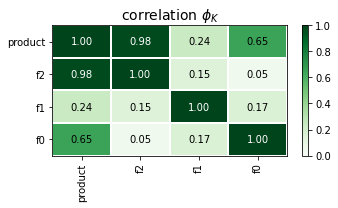

In [ ]:
# корреляционный анализ признаков
geo_data_11 = geo_data_1.iloc()[::100].iloc[:, [1, 2, 3, 4]]
interval_cols = geo_data_11.select_dtypes(include=["number"]).columns[0:11]

phik_overview = phik_matrix(geo_data_11, interval_cols=interval_cols)
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.0,
    figsize=(5, 3)
)

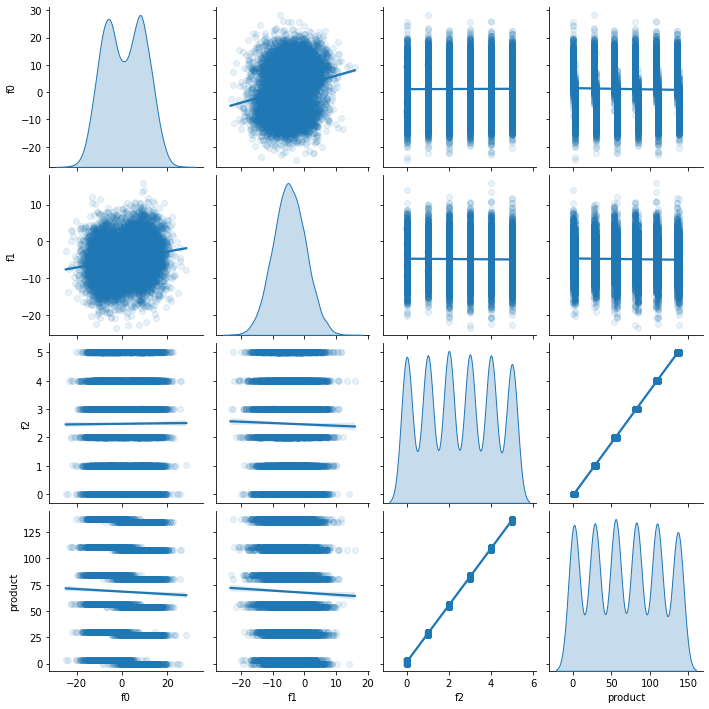

In [ ]:
# оценим рассеяние признаков и целевого таргета
#анализируем каждую десятую строку
train_dataset = geo_data_1.iloc()[::10]
train_dataset.insert(0, "MedHouseVal", train_dataset['product'])
_ = sns.pairplot(
    train_dataset[
        ['f0', 'f1', 'f2', 'product']
    ],
    kind="reg",
    diag_kind="kde",
    plot_kws={"scatter_kws": {"alpha": 0.1}},
)

### Анализ базы geo_data_2

In [ ]:
# посмотрим данные
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.1469870984179529,0.9633279217162892,-0.8289649221710994,27.758673230730036
1,WJtFt,0.2627779016539684,0.2698389572803021,-2.530186515492004,56.06969663239464
2,ovLUW,0.19458728165865746,0.2890350017576741,-5.586432770903118,62.87191004763475
3,q6cA6,2.2360596126935817,-0.5537598999099264,0.930037615920042,114.57284166750858
4,WPMUX,-0.5159928644136754,1.7162655596688288,5.899011469346728,149.60074591275887


In [ ]:
# преобразуем данные типа object в данные типа float64
geo_data_2[['f0', 'f1', 'f2', 'product']] = geo_data_2[['f0', 'f1', 'f2', 'product']].apply(pd.to_numeric)
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
# проверим наличие дубликатов
geo_data_2.duplicated().sum()

0

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера V2</b></font>
    <br />
    <font size="3", color = "black">
<br />
Несмотря на то, что нет явных дубликатов, есть повторяющиеся id с разными количественными признаками. Их очень мало, меньше 0.1% данных, но надо понимать: дубликаты могут не быть одинаковыми на все 100% и такое тоже очень желательно обнаруживать.

In [ ]:
# оценим статистическое распределение
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


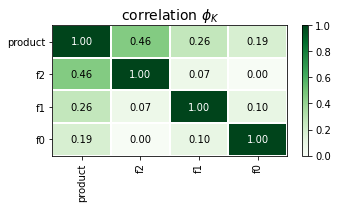

In [ ]:
# корреляционный анализ признаков
geo_data_22 = geo_data_2.iloc()[::100].iloc[:, [1, 2, 3, 4]]
interval_cols = geo_data_22.select_dtypes(include=["number"]).columns[0:11]

phik_overview = phik_matrix(geo_data_22, interval_cols=interval_cols)
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.0,
    figsize=(5, 3)
)

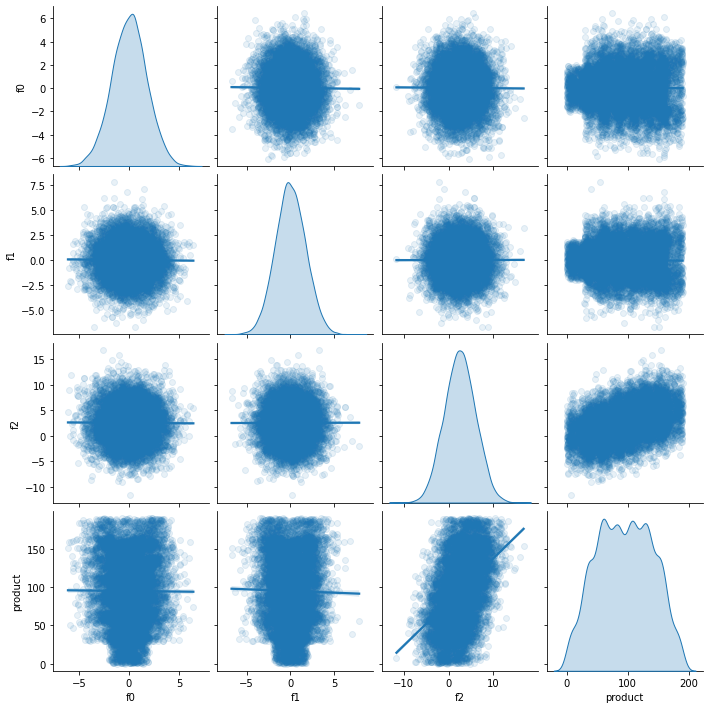

In [ ]:
#анализируем каждую десятую строку
train_dataset = geo_data_2.iloc()[::10]
train_dataset.insert(0, "MedHouseVal", train_dataset['product'])
_ = sns.pairplot(
    train_dataset[
        ['f0', 'f1', 'f2', 'product']
    ],
    kind="reg",
    diag_kind="kde",
    plot_kws={"scatter_kws": {"alpha": 0.1}},
)

### Вывод

1. Пропусков нет.
2. Дубликатов нет.
3. Выбросов нет.
4. В данных был неверный тип для цифровых данных - исправлено.
5. В таблице geo_data_1 признак f2 имеет корреляцию 98%.
6. При таком типе данных нужно решать задачу методом оценки "ближайших соседей", для этого целевой признак, нужно разбить на группы. Делать не будем, так как по условию задачи надо решить с помощью линейной регрессии.

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />    
В целом здорово, что перед моделированием провёл анализ данных

<div class="alert alert-warning">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />
Но кое-чего не хватает в анализе: проверки на дубликаты - полезно практически в любом проекте

## Обучение и проверка модели

2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.<br>
2.2. Обучите модель и сделайте предсказания на валидационной выборке.<br>
2.3. Сохраните предсказания и правильные ответы на валидационной выборке.

In [ ]:
# в качестве целевой переменной используем параметр "product".

RANDOM_STATE = 42
TEST_SIZE = 1/4

def data_preprocessor(geo_data):
    X_train, X_test, y_train, y_test = train_test_split(
        geo_data.drop(
            [
                'product', 'id'
            ],
            axis=1
        ),
        geo_data['product'],
        test_size = TEST_SIZE,
        random_state = RANDOM_STATE
    )

    num_columns = ['f0', 'f1', 'f2']


# создайте общий пайплайн для подготовки данных
    data_preprocessor = ColumnTransformer(
        [
            ('num', MinMaxScaler(), num_columns)
        ],
        remainder = 'passthrough'
    )
# инициализация и обучение модели, получение предсказания
    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_test)

# получение значения RMSE
    rmse = mean_squared_error(y_test, predictions, squared=False)

    X_test['product'] = y_test
    X_test['predictions'] = predictions

# вывод полученного значения RMSE
    return X_test, rmse, X_test['predictions'].mean()


In [ ]:
X_test_0 = data_preprocessor(geo_data_0)[0]
rmse_0 = data_preprocessor(geo_data_0)[1]
mean_0 = data_preprocessor(geo_data_0)[2]
data_preprocessor(geo_data_0)

(             f0        f1        f2     product  predictions
 75721  0.599283 -0.557623  2.121187  122.073350   101.901017
 80184  0.739017 -0.463156 -1.347584   48.738540    78.217774
 19864  1.422743 -0.534917  3.718798  131.338088   115.266901
 76699  1.580244 -0.238458  2.805149   88.327757   105.618618
 92991  0.918974  0.023961  2.598575   36.959266    97.980185
 ...         ...       ...       ...         ...          ...
 21271  0.754647 -0.512213  2.610771  148.821520   105.076959
 34014 -0.062056  0.516884  0.714446  123.454003    74.768176
 81355  0.593769 -0.425260 -0.525017   91.945213    82.544397
 65720  0.198209  0.453940  1.497557  149.295563    81.826689
 11627 -0.246727  1.013025  4.678275   57.244039    93.121062
 
 [25000 rows x 5 columns],
 37.75660035026169,
 92.39879990657768)

In [ ]:
X_test_1 = data_preprocessor(geo_data_1)[0]
rmse_1 = data_preprocessor(geo_data_1)[1]
mean_1 = data_preprocessor(geo_data_1)[2]
data_preprocessor(geo_data_1)

(              f0        f1        f2     product  predictions
 75721   6.078076  0.084568  0.002957    0.000000     0.844738
 80184  16.462386  2.712946  1.993030   53.906522    52.921612
 19864   7.051898  0.766983  4.990194  134.766305   135.110385
 76699  -0.240045 -0.380804  3.999693  107.813044   109.494863
 92991  13.350111 -8.558281  0.002010    0.000000    -0.047292
 ...          ...       ...       ...         ...          ...
 21271   8.141417 -0.832158  4.001976  107.813044   108.351600
 34014  16.601751 -8.141232  2.010371   53.906522    53.604049
 81355  14.674777 -5.633890  1.004171   26.953261    26.708734
 65720  -1.381118 -5.464254  4.001648  110.992147   109.823087
 11627   8.390836 -2.782887  5.007094  134.766305   135.448780
 
 [25000 rows x 5 columns],
 0.890280100102884,
 68.71287803913762)

In [ ]:
X_test_2 = data_preprocessor(geo_data_2)[0]
rmse_2 = data_preprocessor(geo_data_2)[1]
mean_2 = data_preprocessor(geo_data_2)[2]
data_preprocessor(geo_data_2)

(             f0        f1        f2     product  predictions
 75721  2.111118 -1.679773  3.112240  117.441301    98.301916
 80184  0.734759  0.747788  3.670879   47.841249   101.592461
 19864 -2.513109  0.844631 -4.922889   45.883483    52.449099
 76699 -2.035301 -1.522988  5.072839  139.014608   109.922127
 92991  2.744145  1.429952 -1.372661   84.004276    72.411847
 ...         ...       ...       ...         ...          ...
 21271 -1.532677  0.365315  3.840436   40.797226   102.764169
 34014  1.381244  1.168552  2.262261   87.144239    93.431823
 81355  2.902487  0.839203 -2.817721   52.039812    64.098390
 65720  0.942093 -1.424641  0.567559  136.961454    83.764135
 11627  1.015823 -1.600172  1.054157  109.173206    86.558644
 
 [25000 rows x 5 columns],
 40.145872311342174,
 94.77102387765939)

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />    
Получены адекватные модели

### Вывод

1. В данных geo_data_1 - модель вполнила предсказания с высокой точностью rmse (корнем из среднеквадратичной оценки погрешности), что было закономерно при наличии признака f2 с корреляцией 98%. <br>
2. В регионах geo_data_1 и geo_data_2 - точность предсказания низкая. Для увеличения точности нужно использовать модели устойчивые к выбросам - knn или деревья решений. Но для этого надо преобразовать целевой признак в классы. Для досижения точности в 2% достаточно будет 50 классов.

## Подготовка к расчёту прибыли

3.1. Сохраним все ключевые значения для расчётов в отдельных переменных.<br>
3.2. Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе. <br>
3.3. Напишите выводы по этапу подготовки расчёта прибыли.<br>

In [ ]:
budget = 1e+10 # бюджет в рублях
income = 4.5e+5 # доход с 1-й тысячи бараллей, в рублях
bottom_percent = 0.025 # нижняя граница допустимой вероятности убытков
top_percent = 0.975 # верхняя граница доверительного 95% интервала

<div class="alert alert-warning">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />
Неинформативные имена констант. Стоит именовать подробнее.
    </font>
</div>

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера V2</b></font>
    <br />
    <font size="3", color = "black">
<br />    
Другое дело
<br />

In [ ]:
# Средний запас сырья в регионах
mean_0, mean_1, mean_2

(92.39879990657768, 68.71287803913762, 94.77102387765939)

In [ ]:
# Затраты на разработку одной скважины Budget/200, руб
# Достаточный объём сырья для безубыточной разработки, тыс.баррелей (Budget/200)/P

mean = (budget/200)/income
print(f'\n Достаточный объём сырья для безубыточной разработки скважины, тыс. баррелей: {mean:.2f}')


 Достаточный объём сырья для безубыточной разработки скважины, тыс. баррелей: 111.11


<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />    
Расчёт необходимого количества нефти корректен
<br />

### Вывод

Среднего объёма сырья в скважинах в регионах не хватит для безубыточной разработки новой скважины при разведке. Надо отбирать лучшие.

## Расчёт прибыли и рисков

4.1. Выберите скважины с максимальными значениями предсказаний. <br>
4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям. <br>
4.3. Рассчитайте прибыль для полученного объёма сырья. <br>

### Расчёт прибыли и рисков для региона X_test_0

In [ ]:
# Посчитаем размер предсказанной выручки в 200-х лучших скважин из 500 случайных для региона с данными X_test_0

product = X_test_0['product'] # реальные значения объёмов
predictions = X_test_0['predictions'] # предсказанные значения объёмов

# Функция сортировки значений предсказаний и вывод суммы соответствующих им реальных значений * на стоимость
def revenue(product, predictions, count):
    sorted_predictions = predictions.sort_values(ascending=False)
    selected = product[sorted_predictions.index][:count]



    # reviewers code: DEBUG
    if product[sorted_predictions.index].shape[0] != sorted_predictions.shape[0]:
        print("Shape mismatch! Selected target:", product[sorted_predictions.index].shape)


    return income * selected.sum()

state = np.random.RandomState(12345)

# 1000-кратный анализ выборок из 500 значений, в которых анализируется предсказанныя прибыль на 200 лучших объектах
values = []
for i in range(1000):
    product_subsample = product.sample(500, replace=True, random_state=state)
    predictions_subsample = predictions[product_subsample.index]
    values.append(revenue(product_subsample.reset_index(drop=True), predictions_subsample.reset_index(drop=True), 200))

values0 = pd.Series(values) # средняя выручка с 200 лучших скважин
lower0 = values0.quantile(bottom_percent) # нижняя оценка риска. Вероятность получть значение меньше расчитанного
top0 = values0.quantile(top_percent) # верхняя граница 95% интервала
mean0 = values0.mean()
confidence_interval0 = st.t.interval(0.95, len(values0)-1, loc=np.mean(values0), scale=st.sem(values0))

print("Средняя выручка с 200 лучших скважин в geo_data_0:", mean0.round())
print("С вероятностью 2.5% прибыль составит:", (lower0-budget).round())
print("Возможная средняя прибыль составит", (mean0-budget).round())
print("95%-ый доверительный интервал выручки:", (confidence_interval0[0]-budget, confidence_interval0[1]-budget))

Средняя выручка с 200 лучших скважин в geo_data_0: 10406278783.0
С вероятностью 2.5% прибыль составит: -117742136.0
Возможная средняя прибыль составит 406278783.0
95%-ый доверительный интервал выручки: (389978382.1839962, 422579184.6648426)


In [ ]:
# Вычислим границы 95% доверительного интервала
values0.describe(percentiles = [0.025, 0.50, 0.975])

count    1.000000e+03
mean     1.040628e+10
std      2.626780e+08
min      9.596009e+09
2.5%     9.882258e+09
50%      1.040629e+10
97.5%    1.091174e+10
max      1.120724e+10
dtype: float64

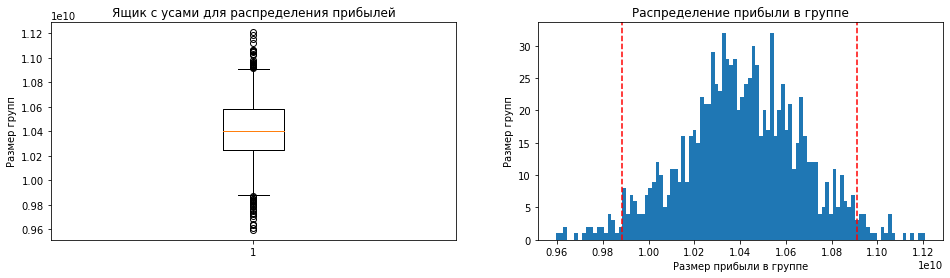

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].boxplot(values0, whis=[2.5,97.5])
axes[0].set_title("Ящик с усами для распределения прибылей")
axes[0].set_ylabel("Размер групп");

axes[1].hist(values0, bins = 100)
axes[1].set_xlabel("Размер прибыли в группе")
axes[1].set_ylabel("Размер групп")
axes[1].set_title("Распределение прибыли в группе");

plt.axvline(x=lower0, color='red', linestyle='--')
plt.axvline(x=top0, color='red', linestyle='--')

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />
С одной стороны мелочь, но я к ней очень строг.

В чём разница того, что было в тренажёре и того, что тут в проекте? Там была задача классификации, а тут - регрессии. Поэтому там предсказания модели были вероятностями принадлежности к классам, а у нас - количество продукта в скважине. Никакого отношения прогноз нашей модели к вероятностям не имеет, поэтому переменных с названиями probabilities или probs быть не должно. Имена переменных должны соответствовать их содержимому.

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />
Но есть проблема серьёзнее. У тебя в функции есть один ну очень неочевидный баг. Настолько неочевидный, что без бутстрапа функция бы была абсолютно корректной, а вот с ним есть нюансы. Я добавил тебе отладочную печать, которая срабатывает, когда у тебя для 500 предсказаний почему-то берётся в расчёт больше, чем 500 таргетов. Явно нежелательное поведение, но печать срабатывает регулярно (смотри ниже). Сейчас покажу из-за чего на небольшом синтетическом примере:

In [ ]:
# КОД РЕВЬЮЕРА
# предположим, у нас есть небольшой сэмпл из 5 предсказаний и 5 соответствующих таргетов
_target = pd.Series([2, 2, 3, 3, 3], index=[2, 2, 3, 3, 3])
_preds = pd.Series([2, 2, 3, 3, 3], index=[2, 2, 3, 3, 3]).sort_values(ascending=False)


# берём таргеты по индексам предсказаний:

display(_target.loc[_preds.index])

3    3
3    3
3    3
3    3
3    3
3    3
3    3
3    3
3    3
2    2
2    2
2    2
2    2
dtype: int64

<div class="alert alert-danger">
<font size="4"></font>
    <font size="3", color = "black">
Как так? Почему предсказаний 5, а таргетов аж 13? На самом деле, всё очень просто. На примере элементов с индексом и значением 2. Когда мы попросили у пандаса взять таргеты по индексам предсказаний, и у нас и там и там 2 одинаковых элемента, он отнюдь должен вернуть не 2. Он для каждого запрошенного индекса предсказаний выдаёт все таргеты с таким индексом. Таким образом, мы запросили 2 раза элемента с индексом 2 - оба раза пандас отдал нам 2 таких элемента из таргетов - всего 4 элемента. А если бы у нас было и там, и там по 3 одинаковых элемента, то в итоге было бы 9. Логика, надеюсь, ясна. И вот поэтому почти всегда получается, что когда ты берёшь таргеты по индексам 500 предсказаний, получаешь в итоге более чем 500 таргетов. Благодаря бутстрапу в выборках есть идентичные элементы, с одинаковыми индексами, и они каждый раз вот таким образом "множатся" при вычислении прибыли.

Теперь поговорим о том, как же с этим быть. Ещё один пример:

In [ ]:
# КОД РЕВЬЮЕРА
# предположим, у нас есть небольшой сэмпл из 5 предсказаний и 5 соответствующих таргетов
_target = pd.Series([2, 2, 3, 3, 3])
_preds = pd.Series([2, 2, 3, 3, 3]).sort_values(ascending=False)


# берём таргеты по индексам предсказаний:

display(_target.loc[_preds.index][:5])

2    3
3    3
4    3
0    2
1    2
dtype: int64

<div class="alert alert-danger">
<font size="4"></font>
    <font size="3", color = "black">
Тут всё корректно, а разница с предыдущим примеров только в том, что индексы одинаковых элементов не одинаковые. То есть для корректности тебе достаточно сделать так, чтобы элементы таргетов и предсказаний остались бы теми же, а индексы бы стали новыми, неповторяющимися. Это можно сделать с помощью метода .reset_index(), указав туда параметр drop=True

<font color='blue'> <b> в .sample() установил replace=False

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера V2</b></font>
    <br />
    <font size="3", color = "black">
        <b></b>

`replace=False` - некорректное устранение проблемы. Дублирующиеся элементы нужны для статистической корректности. Сейчас обясню почему.

Во-первых, в описании проекта слабо раскрыто, что имеющиеся у нас данные, по 100 тысяч скважин - это не регион полностью, это какая-то часть, уже разработанная, этих регионов, а ещё неразработанных скважин в них много, и мы хотим оценить целесообразность продолжения разработки каждого из регионов. Иначе, если бы 100 тысяч - это прям совсем полностью регион, то работа смысла просто не имеет.

В чём состоит идея бутстрапа?

Мы считаем данные каждого из регионов получены из одного распределения. Распределение в каждом регионе своё, но внутри одного региона распределение скважин подчиняется одному и тому же распределению. Такое предположение весьма логично. Мы хотим оценить это распределение и предполагаем, что наши данные это распределение полностью задают таким образом, что в этом регионе каждая новая, ещё неоткрытая, скважина идентична одной из имеющихся у нас, разработанных, причём равновероятно каждой из имеющихся. То есть, если у нас на валидации 25 тысяч строк, то каждая новая скважина с вероятностью 1/25000 идентична каждой, из имеющихся в валидации.

Соответственно, набирая какой-то сэмпл мы берём равновероятно какой-то элемент исходных данных, потом берём ещё один, не обращая внимания на то, какие у нас уже есть выбранные. И повторяем пока не набрали нужный объём. Таким образом, в бутстрапе повторы - возможны, в этом нет ошибки. Просто вот эти, набираемые в бутстрапированную выборку скважины - это не те же, что мы уже разработали, а их какие-то мысленные скважины, ещё не разработанные, но являющиеся идентичными каким-то из ранее открытых. Такой вот статистический трюк.

И понятно, что, например, если ты продолжил разработку региона и открыл скважину, идентичную одной из ранее разработанных, то продолжая открывать новые скважины, ты вполне можешь и ещё раз, и не один раз, открыть ещё такую же скважину. Именно поэтому повторяющиеся элементы в бутстрапе - это логично и правильно.

Говоря сухим языком статистики, если бы повторы элементов выборки были бы невозожны, то в выборках была бы зависимость. Ну то есть, ты взяла первый элемент выборки, если повторы невозожны, то все остальные элементы не могут быть таким же как первый - получается каждый последующий элемент зависит от первого. А для корректного исследвания распределения скважин данные внутри выборки должны быть независимы.

Так что `replace` надо вернуть значение `True`. А проблему устранить другим способом. Например, предлженным ранее мной: сделать `.reset_index(drop=True)` для сэмла таргетов и для сэмпла предсказаний.

<font color='blue'> <b> Проблему понял. Исправил индексы входящих значений в selected на неповторяющиеся с помощью .reset_index(drop=True) в связи с вышеизложенной дилеммой.

### Расчёт прибыли и рисков для региона X_test_1

In [ ]:
# Посчитаем размер предсказанной выручки в 200-х лучших скважин из 500 случайных для региона с данными X_test_1

product = X_test_1['product'] # реальные значения объёмов
predictions = X_test_1['predictions'] # предсказанные значения объёмов

state = np.random.RandomState(12345)

# 1000-кратный анализ выборок из 500 значений, в которых анализируется предсказанныя прибыль на 200 лучших объектах
values = []
for i in range(1000):
    product_subsample = product.sample(500, replace=False, random_state=state)
    predictions_subsample = predictions[product_subsample.index]
    values.append(revenue(product_subsample.reset_index(drop=True), predictions_subsample.reset_index(drop=True), 200))

values1 = pd.Series(values) # средняя выручка с 200 лучших скважин
lower1 = values1.quantile(bottom_percent) # нижняя оценка риска. Вероятность получть значение меньше расчитанного
top1 = values1.quantile(top_percent) # верхняя граница 95% интервала
mean1 = values1.mean()
confidence_interval1 = st.t.interval(0.95, len(values1)-1, loc=np.mean(values1), scale=st.sem(values1))

print("Средняя выручка с 200 лучших скважин в geo_data_1:", mean1.round())
print("С вероятностью 2.5% прибыль составит:", (lower1-budget).round())
print("Возможная средняя прибыль составит", (mean1-budget).round())
print("95%-ый доверительный интервал выручки:", (confidence_interval1[0]-budget, confidence_interval1[1]-budget))

Средняя выручка с 200 лучших скважин в geo_data_1: 10442436902.0
С вероятностью 2.5% прибыль составит: 28958037.0
Возможная средняя прибыль составит 442436902.0
95%-ый доверительный интервал выручки: (429592060.2332535, 455281743.54774857)


<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера V3</b></font>
    <br />
    <font size="3", color = "black">
<br />    
Ура, баг устранён!<br>

В образовательных целях расскажу тебе какие ещё были варианты решения проблемы:

1. На самом деле, если внимательно посмотреть на нашу задачу, то становится понятно, что переменная target_subsample в функции bootstrap нам не нужна. Фактически она используется только для того, чтобы по её индексам взять сэмпл предсказаний. Но мы можем получить сэмпл предсказаний напрямую:

`pred_subsample = predictions.sample(n=500, replace=True, random_state=state)`

а в функцию расчёта прибыли передать pred_subsample и target (не сэмпл таргетов, а исходный, полный валидационный таргет, 25000 уникальных элементов с неповторяющимися индексами), и тогда получилось бы, что мы сэмплируем предсказания, сортируем их, выбираем 200 лучших, и только после этого по их индексам берём таргеты. Но поскольку таргеты бы были исходные, с уникальными индексами, то запросив один и тот же индекс 2 раза, мы бы в ответ получили 2 одинаковых элемента, а не 4, ошибки бы не было.

2. Можно было бы хранить предсказания и таргеты в одном датафрейме и оперировать бы с ним, а не отдельными его колонками. Тогда вообще не надо было бы делать операцию взятия по индексам: применил .sample() ко всему датафрейму, отсортировал по одной колонке, просуммировал первые 200 значений другой. Всё, элементы одной строки датафрейма между собой жёстко связаны, никакого расхождения не может быть, всё корректно.

Сброс индексов - тоже рабочее решение. Другие решил показать потому что бывает на проблему полезно посмотреть с разных сторон, увидеть разные подходы к решению.

In [ ]:
# Вычислим границы 95% доверительного интервала
values1.describe(percentiles = [0.025, 0.50, 0.975])

count    1.000000e+03
mean     1.044244e+10
std      2.069923e+08
min      9.680036e+09
2.5%     1.002896e+10
50%      1.044559e+10
97.5%    1.083444e+10
max      1.113620e+10
dtype: float64

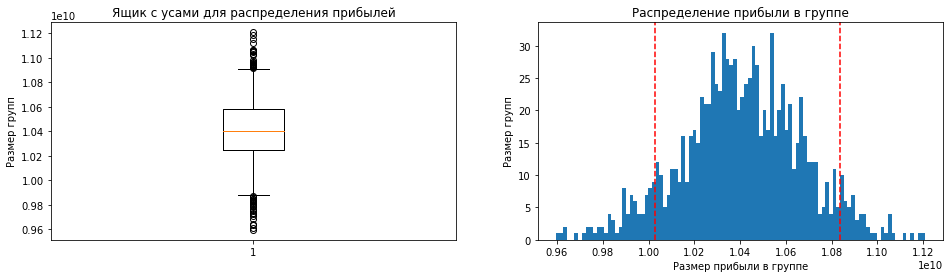

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].boxplot(values0, whis=[2.5,97.5])
axes[0].set_title("Ящик с усами для распределения прибылей")
axes[0].set_ylabel("Размер групп");

axes[1].hist(values0, bins = 100)
axes[1].set_xlabel("Размер прибыли в группе")
axes[1].set_ylabel("Размер групп")
axes[1].set_title("Распределение прибыли в группе");

plt.axvline(x=lower1, color='red', linestyle='--')
plt.axvline(x=top1, color='red', linestyle='--')

<div class="alert alert-warning">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />
Точно ли тебе надо обявлять функцию прибыли несколько раз, а не 1?
    </font>
</div>

### Расчёт прибыли и рисков для региона X_test_2

In [ ]:
# Посчитаем размер предсказанной выручки в 200-х лучших скважин из 500 случайных

product = X_test_2['product'] # реальные значения объёмов
predictions = X_test_2['predictions'] # предсказанные значения объёмов

state = np.random.RandomState(12345)

# 1000-кратный анализ выборок из 500 значений, в которых анализируется предсказанныя прибыль на 200 лучших объектах
values = []
for i in range(1000):
    product_subsample = product.sample(500, replace=False, random_state=state)
    predictions_subsample = predictions[product_subsample.index]
    values.append(revenue(product_subsample.reset_index(drop=True), predictions_subsample.reset_index(drop=True), 200))

values2 = pd.Series(values) # средняя выручка с 200 лучших скважин
lower2 = values2.quantile(bottom_percent) # нижняя оценка риска. Вероятность получть значение меньше расчитанного
top2 = values2.quantile(top_percent) # верхняя граница 95% интервала
mean2 = values2.mean()
confidence_interval2 = st.t.interval(0.95, len(values2)-1, loc=np.mean(values2), scale=st.sem(values2))

print("Средняя выручка с 200 лучших скважин в geo_data_2:", mean2.round())
print("С вероятностью 2.5% прибыль составит:", (lower2-budget).round())
print("Возможная средняя прибыль составит", (mean2-budget).round())
print("95%-ый доверительный интервал выручки:", (confidence_interval2[0]-budget, confidence_interval2[1]-budget))

Средняя выручка с 200 лучших скважин в geo_data_2: 10367919519.0
С вероятностью 2.5% прибыль составит: -116746476.0
Возможная средняя прибыль составит 367919519.0
95%-ый доверительный интервал выручки: (352005418.5759907, 383833619.4462223)


In [ ]:
# Вычислим границы 95% интервала
values2.describe(percentiles = [0.025, 0.50, 0.975])

count    1.000000e+03
mean     1.036792e+10
std      2.564528e+08
min      9.426454e+09
2.5%     9.883254e+09
50%      1.036666e+10
97.5%    1.088026e+10
max      1.117118e+10
dtype: float64

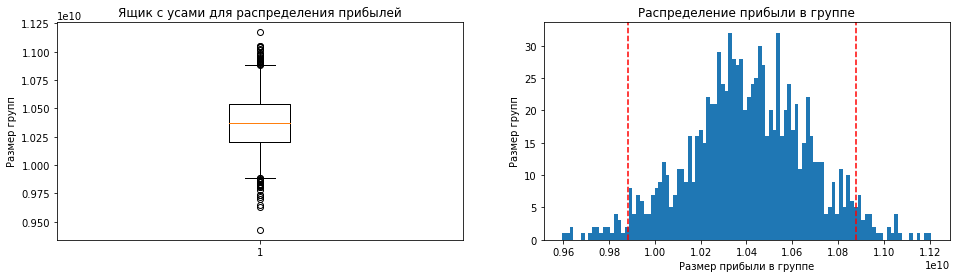

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].boxplot(values2, whis=[2.5,97.5])
axes[0].set_title("Ящик с усами для распределения прибылей")
axes[0].set_ylabel("Размер групп");

axes[1].hist(values0, bins = 100)
axes[1].set_xlabel("Размер прибыли в группе")
axes[1].set_ylabel("Размер групп")
axes[1].set_title("Распределение прибыли в группе");

plt.axvline(x=lower2, color='red', linestyle='--')
plt.axvline(x=top2, color='red', linestyle='--')

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />
Интервал - это 2 границы. Нижнюю ты вычислил. А где верхняя?

### Вывод

Вероятность получить прибыль с вероятностью 97,5% на 200 скважинах при бюджете 10 млрд. при рандомном выборе из 500 скважин - соответствует региону с базой geo_data_1. <br>
 <br>
С вероятностью 2.5% прибыль составит: 29 млн.руб<br>
Возможная средняя прибыль составит 442 млн.руб, с 95% доверительным интервалом: (429.5, 455.3) млн.руб <br>

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />
Финальные результаты было бы неплохо визуализировать, ведь они - то, ради чего вся работа делалась. Для этого подойдут ящики с усами или гистограммы распределений выборочных прибылей с нанесёнными на них границами найденных дов. интервалов.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован

<div class="alert alert-info">
<font size="4"><b>🍕 Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />    
В принципе, работа неплохая, но есть что исправить:<br>

+ Именовать переменные так, чтобы имя соответствовало смыслу
+ Устранить баг с индексами
+ Вычислить обе границы интервала

На этом пока всё. Жду новую отправку!